### Lotka-Volterra for 2 and 3 species
Christoph Wald

object class for 2 species taken from BingKan Xue, https://cmp.phys.ufl.edu/files/Lotka-Volterra.html

cf. also Anthony Hill, https://github.com/INASIC/predator-prey_systems


In [54]:
#import necessary packages
import numpy as np
#import scipy.integrate as intgr
from scipy.stats import linregress
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Equations for two species

* $\frac{dX}{dt} = X(a-bY)$
* $\frac{dY}{dt} = Y(-c + dX)$


with

* $X$ = prey population 
* $Y$ = redator population

* a = growth rate of prey
* b = death rate of prey due to predatation
* c = negative growth rate of predator (= death rate)
* d = growth rate of predator due to predation


In [2]:
#class for calculating time rows 

class LotkaVolterra:
    """
    simulation the Lotka-Volterra system.
    """
    
    def __init__(self, param, init, record=True):
        """
        initialize by assigning parameter values and initial values.
        inputs:
        param: list, parameters of the model: a,b,c,d (in this order)
        init: list, initial abundance of prey and predator species (in this order)
        record: boolean, whether to record history of abundances at time points
        """
        self.param = param    # list of parameters
        self.abundance = np.asarray(init)    # current abundance of each species
        self.time = 0.                  # time since beginning of simulation
        self.record = record            # whether to record time series
        if self.record:
            self.time_hist = [0.]                  # list of time points
            self.abundance_hist = [self.abundance.copy()]     # list of abundances at time points
    
    def equations(self, x, t):
        """
        calculate time derivatives of abundances in the Lotka-Volterra system.
        inputs:
        x: 1-d array, current abundances of both species.
        t: float, current time.
        outputs:
        dxdt: 1-d array, time derivatives of abundances.
        """
        X, Y = x    # parse variables, X is prey and Y is predator
        dXdt = self.param[0] * X - self.param[1] * X * Y
        dYdt = self.param[2] * X * Y - self.param[3] * Y
        return [dXdt, dYdt]
    
    def run(self, tmax, dt):
        """
        solve equations until time `tmax` since the beginning of the simulation.
        inputs:
        tmax: float, time since the beginning of the simulation.
        dt: float, time step by which solution is calculated
        """
        T = tmax - self.time    # time remaining to be solved
        new_times = np.arange(0, T+dt, dt)    # new time points at every step dt
        x0 = self.abundance    # current abundances as initial values to the solver
        sol = odeint(self.equations, x0, new_times)    # solve equations using integrator
        if self.record:
            self.time_hist.extend(self.time + new_times[1:])    # save time points
            self.abundance_hist.extend(sol[1:])    # save abundances at given time points
        self.time += new_times[-1]    # update time to latest
        self.abundance = sol[-1]    # update abundances to latest

In [3]:
#two runs with different randomized initial settings


a = 5    # growth rate of the prey
b = a    # feeding rate of the predator
c = 1    # growth rate of the predator per prey available
d = 1    # death rate of the predator

num = 2    # number of trajectories to simulate
lv_list = []    # list of simulations with different initial values

T = 10.    # total time to integrate the trajectories
dt = 0.01   # time steps to evaluate the trajectories at

for i in range(num):
    X0, Y0 = np.random.rand(2)    # random initial values between 0 and 1
    lv = LotkaVolterra([a,b,c,d], [X0, Y0])
    lv.run(T, dt)
    print(f'current time = {lv.time}, current populations = {lv.abundance}')
    lv_list.append(lv)

current time = 10.0, current populations = [1.91194432 0.62922121]
current time = 10.0, current populations = [0.14702608 0.4671116 ]


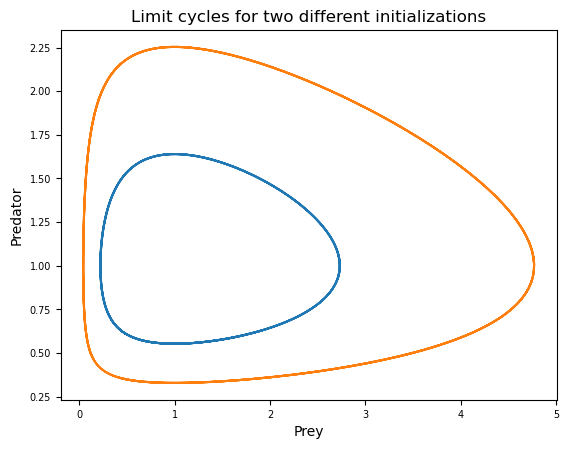

In [4]:
#plot (and save) limit cycles

numbers = []
plt.figure()
for lv in lv_list:
    time_hist = lv.time_hist    # time history, excluding t=0
    num_hist = np.array(lv.abundance_hist) # abundance history of all species
    numbers.append(num_hist)
    plt.plot(num_hist[:,0], num_hist[:,1])    # plot prey vs predator abundances
plt.tick_params(labelsize=7)
plt.title("Limit cycles for two different initializations")
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.savefig("limit.png")
plt.show()

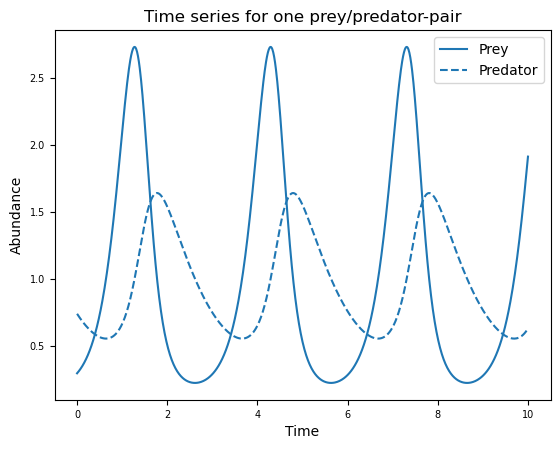

In [5]:
#plot and save time series of one run

plt.figure()
plt.plot(time_hist, numbers[0][:,0], linestyle='-', color= '#1f77b4', label="Prey")
plt.plot(time_hist, numbers[0][:,1], linestyle='--', color='#1f77b4', label = "Predator")
#plt.plot(time_hist, numbers[1][:,0], linestyle='-', color='#ff7f0e')
#plt.plot(time_hist, numbers[1][:,1], linestyle='--', color='#ff7f0e')

# Add labels and legend
plt.title("Time series for one prey/predator-pair")
plt.tick_params(labelsize=7)
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.legend()


# Save and show the figure
plt.savefig("time.png")
plt.show()


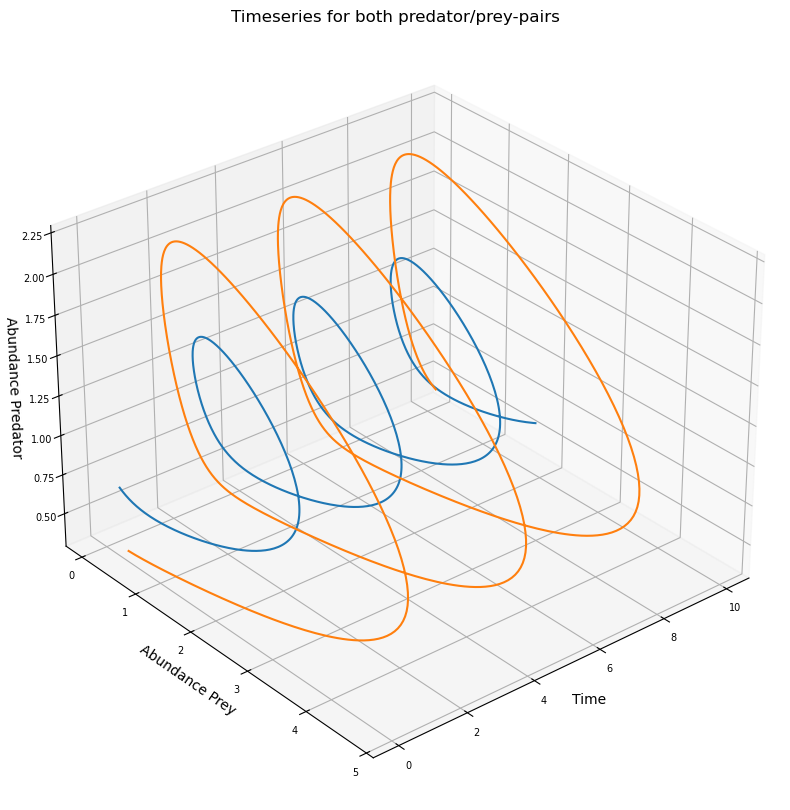

In [6]:
#plt and save both time series

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')
fig.subplots_adjust(left=0.8, right=0.9, bottom=0.1, top=0.9)
ax.view_init(elev=30, azim=50)
for lv in lv_list:
    time_hist = lv.time_hist
    num_hist = np.array(lv.abundance_hist)
    ax.plot(time_hist, num_hist[:, 0], num_hist[:, 1], label='Trajectory')
ax.tick_params(labelsize=7, pad=0)  # Move X axis tick labels closer
ax.invert_xaxis()
ax.set_xlabel('Time', labelpad=-2)
ax.set_ylabel('Abundance Prey', labelpad=-2)
ax.set_zlabel('Abundance Predator', labelpad=-2)
plt.title('Timeseries for both predator/prey-pairs')
plt.tight_layout()
plt.savefig("3D.png")
plt.show()

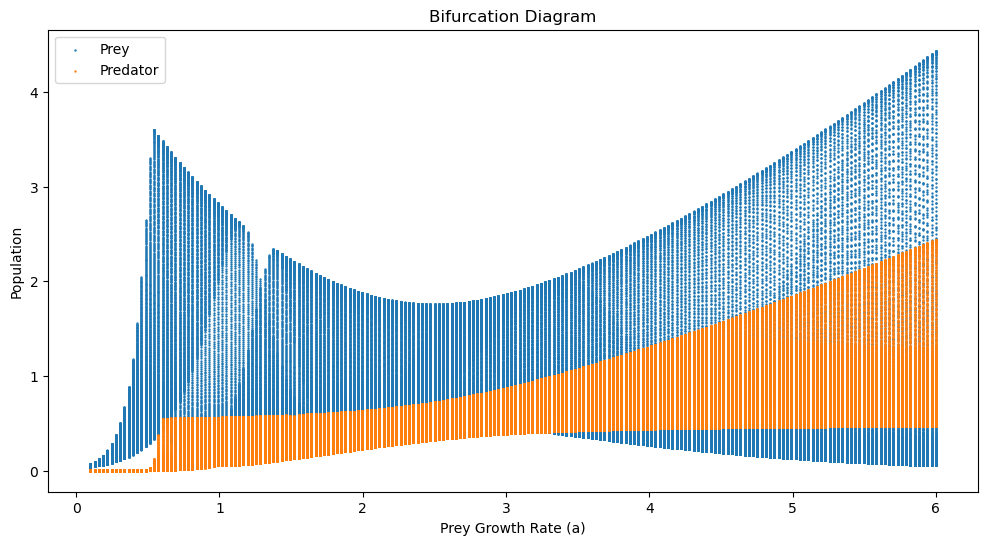

In [7]:
#Extra: Bifurcation Diagram (with varying parameter a)

# Parameters
b, c, d = 5, 1, 1  # Fixed parameters
X0, Y0 = 0.5, 0.5  # Initial conditions
T = 10.  # Total time for simulation
dt = 0.01  # Time step
a_values = np.linspace(0.1, 6, 200)  # Range of `a` values to test
num_steps_to_record = int(T / dt * 0.5)  # Number of points after transient

# Bifurcation data
bifurcation_data = []

for a in a_values:
    lv = LotkaVolterra([a, b, c, d], [X0, Y0], record=True)  # Ensure recording
    lv.run(T, dt)
    abundance_hist = np.array(lv.abundance_hist[-num_steps_to_record:])  # Use history
    prey_vals = abundance_hist[:, 0]  # Prey population
    predator_vals = abundance_hist[:, 1]  # Predator population
    bifurcation_data.append((prey_vals, predator_vals))

# Plot bifurcation
plt.figure(figsize=(12, 6))
for i, (a, (prey_vals, predator_vals)) in enumerate(zip(a_values, bifurcation_data)):
    plt.scatter([a] * len(prey_vals), prey_vals, s=0.5, color='#1f77b4')  # Prey
    plt.scatter([a] * len(predator_vals), predator_vals, s=0.5, color='#ff7f0e')  # Predator

plt.xlabel('Prey Growth Rate (a)')
plt.ylabel('Population')
plt.title('Bifurcation Diagram')
plt.legend(['Prey', 'Predator'], loc='upper left')
plt.show()


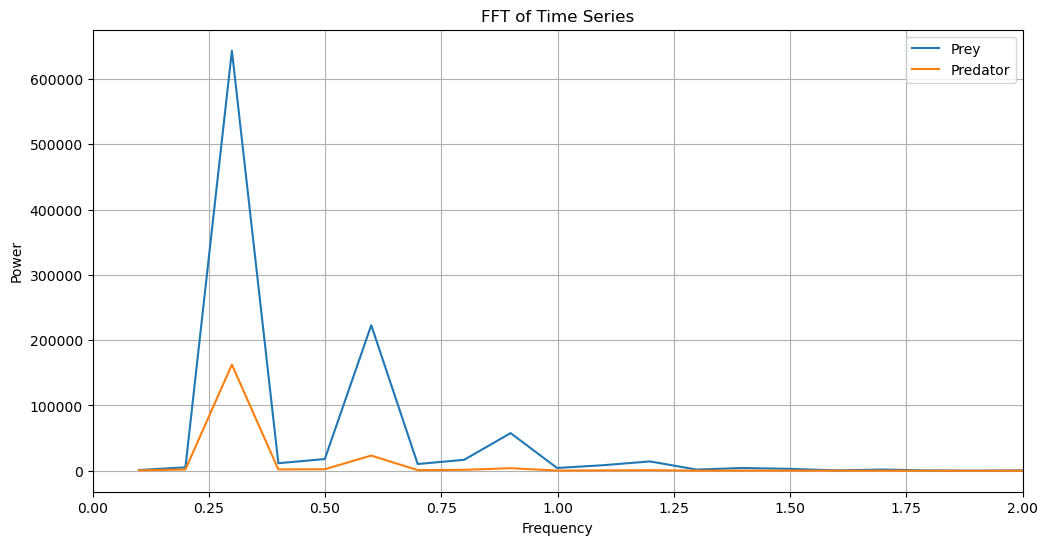

In [8]:
#Extra: Frequency analysis of oscillations

# Assuming lv.time_hist, numbers, and dt are already defined
time_hist = np.array(lv.time_hist)

prey_hist = numbers[1][:, 0]  # Prey population time series
pred_hist = numbers[1][:, 1]  # Predator population time series

# Perform FFT
n = len(time_hist)
freqs = np.fft.fftfreq(n, d=dt)  # Frequency bins

# FFT of prey population
fft_vals_prey = np.fft.fft(prey_hist)
power_spectrum_prey = np.abs(fft_vals_prey)**2  # Power spectrum of prey

# Filter positive frequencies for prey
positive_freqs_prey = freqs[freqs > 0]
positive_power_prey = power_spectrum_prey[freqs > 0]

# FFT of predator population
fft_vals_pred = np.fft.fft(pred_hist)
power_spectrum_pred = np.abs(fft_vals_pred)**2  # Power spectrum of predator

# Filter positive frequencies for predator
positive_freqs_pred = freqs[freqs > 0]
positive_power_pred = power_spectrum_pred[freqs > 0]

# Plot the FFT results
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs_prey, positive_power_prey, color='#1f77b4', label="Prey")
plt.plot(positive_freqs_pred, positive_power_pred, color='#ff7f0e', label="Predator")
plt.xlim(0, 2)  # Adjust as needed
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('FFT of Time Series')
plt.grid(True)
plt.legend()
plt.show()



####  Lotka-Volterra for three species

based on the equation

*$
        \frac{dX_i}{dt} = X_i(\sum_{j=1}^3 A_{ij}(1-X_j)) 
        $

from the paper 

- Arneodo, A., Coullet, P., Tresser, C. (1980). Occurrence of strange attractors in three-dimensional Volterra equations. Phys.
Lett. A, 79A(4): 259-263.

cited in

- Flake, G. W. (1998). The computational beauty of nature: Computer explorations of fractals, chaos, complex systems, and
adaptation. MIT Press.

In [17]:
#class according to the above equation

class LotkaVolterraMulti:
    """
    Simulate the Lotka-Volterra system for multiple species.
    """
    
    def __init__(self, A, init, record=True):
        """
        Initialize by assigning parameter values and initial values.
        
        Args:
            A (2D array): Interaction matrix defining relationships between species.
            init (list): Initial abundance of species.
            record (bool): Whether to record the history of abundances over time.
        """
        self.A = np.asarray(A)  # Interaction matrix
        self.abundance = np.asarray(init)  # Initial abundances
        self.time = 0.0  # Time since beginning of simulation
        self.record = record
        if self.record:
            self.time_hist = [0.0]  # History of time points
            self.abundance_hist = [self.abundance.copy()]  # History of abundances
    
    def equations(self, x, t):
        """
        Calculate time derivatives of abundances in the Lotka-Volterra system.
        
        Args:
            x (1D array): Current abundances of species.
            t (float): Current time.
        
        Returns:
            dxdt (1D array): Time derivatives of abundances.
        """
        dxdt = np.zeros_like(x)  # Initialize derivatives
        for i in range(len(x)):  # Loop over species
            dx_i = 0
            for j in range(len(x)):  # Interaction terms
                dx_i += self.A[i, j] * (1 - x[j])
            dxdt[i] = x[i] * dx_i  # Apply the formula
        return dxdt
    
    def run(self, tmax, dt):
        """
        Solve equations until time `tmax`.
        
        Args:
            tmax (float): Total time for simulation.
            dt (float): Time step for numerical integration.
        """
        T = tmax - self.time  # Remaining time
        new_times = np.arange(0, T + dt, dt)  # Time points for integration
        x0 = self.abundance  # Current abundances
        
        # Integrate using odeint
        sol = odeint(self.equations, x0, new_times)
        
        if self.record:
            # Save history
            self.time_hist.extend(self.time + new_times[1:])
            self.abundance_hist.extend(sol[1:].tolist())
        
        # Update state
        self.time += new_times[-1]
        self.abundance = sol[-1]


In [10]:
#function to plot and save times series

def plot_3species(time_hist, abundance_hist,title):
    plt.figure(figsize = (10,4))
    plt.plot(time_hist, np.array(abundance_hist)[:,0], label='Species 1')    
    plt.plot(time_hist, np.array(abundance_hist)[:,1], label='Species 2')    
    plt.plot(time_hist, np.array(abundance_hist)[:,2], label='Species 3')    
    plt.xlabel('Time')
    plt.ylabel('Abundance')
    #plt.legend(loc='upper right')
    plt.title(title)
    plt.savefig(title+".png")
    plt.show()
    

In [20]:
#function to plot and save phase plane

def plot_3species_phase(time_points, abundance_hist, title, elev=30, azim=45):
    """
    Plots the 3-species phase space trajectory.
    
    Args:
        time_points: List or array of time points (not used here but can be for annotations).
        abundance_hist: List or array of species abundances over time.
        title: Title of the plot.
        elev: Elevation angle in degrees (default=30).
        azim: Azimuth angle in degrees (default=45).
    """
    abundance_history = np.array(abundance_hist)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D trajectory
    ax.plot(abundance_history[:, 0], abundance_history[:, 1], abundance_history[:, 2], color='b')
    ax.tick_params(labelsize=7, pad=0)  # Move X axis tick labels closer
    # Set axis labels
    #ax.set_xlabel('Species 1')
    #ax.set_ylabel('Species 2')
    #ax.set_zlabel('Species 3')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Set the title
    ax.set_title(title)

    # Set the viewing angle
    ax.view_init(elev=elev, azim=azim)
    plt.savefig(title+"_phase.png")
    # Show the plot
    plt.show()


In [37]:

#fixed initialization values for visually pleasing results
x = np.array([0.29721707, 0.50055865, 0.84398311])
#x = np.random.rand(3)

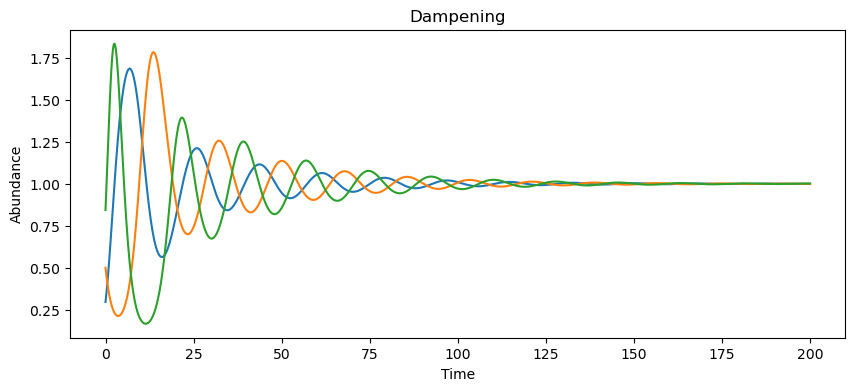

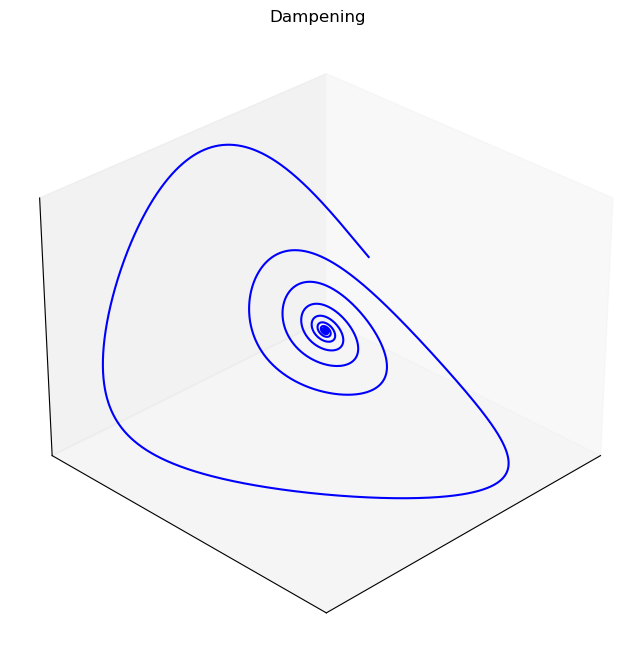

In [38]:
#create dampenend oscillations
alpha = 0.75
#fixed parameter set
param = [[0.5,0.5,0.1], [-0.5,-0.1,0.1], [alpha, 0.1,0.1]]
lv = LotkaVolterraMulti(param, x)
lv.run(200.,0.01)
plot_3species(lv.time_hist[:20000], lv.abundance_hist[:20000], "Dampening")
plot_3species_phase(lv.time_hist, lv.abundance_hist, "Dampening")

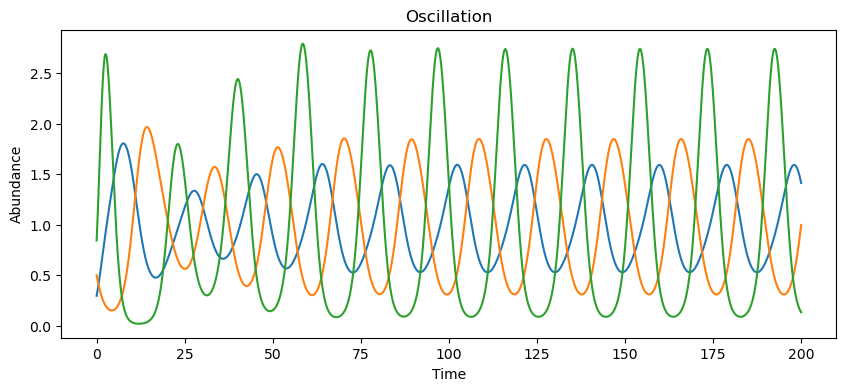

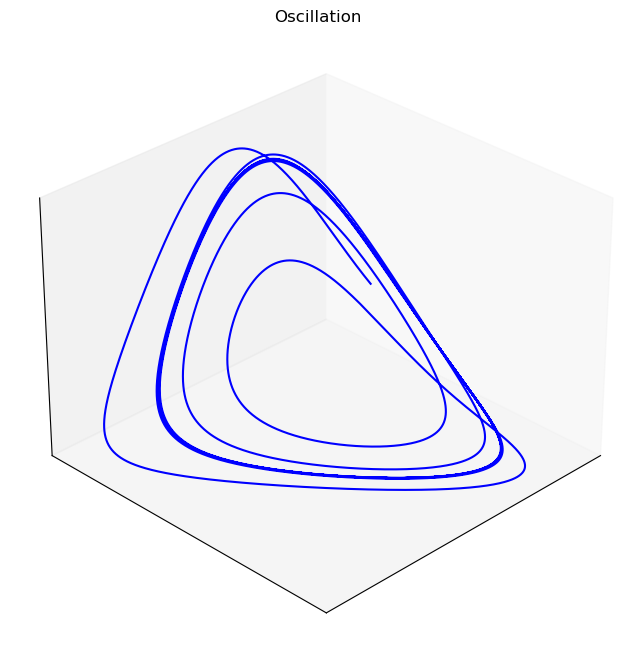

In [39]:
#create oscillations
alpha = 1.2
param = [[0.5,0.5,0.1], [-0.5,-0.1,0.1], [alpha, 0.1,0.1]]
lv = LotkaVolterraMulti(param, x)
lv.run(400.,0.01)
plot_3species(lv.time_hist[:20000], lv.abundance_hist[:20000], "Oscillation")
plot_3species_phase(lv.time_hist, lv.abundance_hist, "Oscillation")

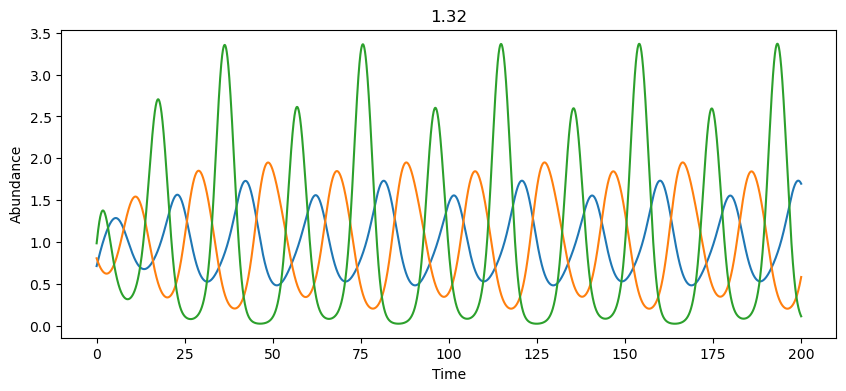

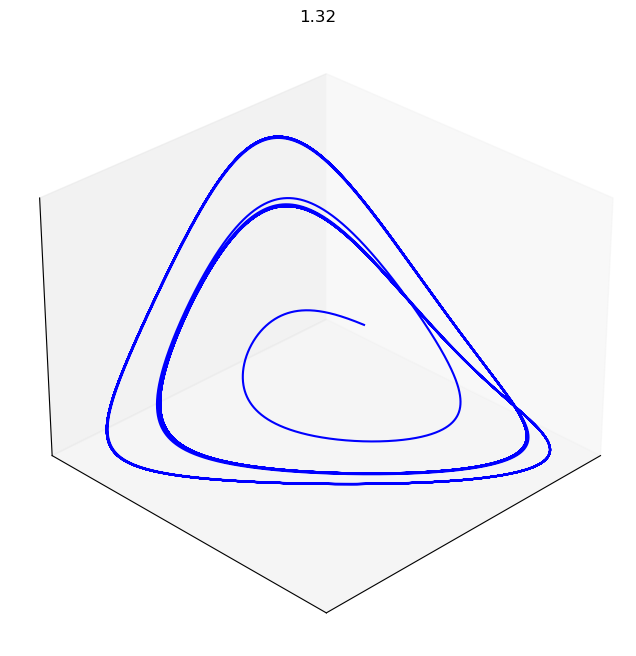

In [40]:
#create bifurcations
alpha = 1.32
param = [[0.5,0.5,0.1], [-0.5,-0.1,0.1], [alpha, 0.1,0.1]]
x = np.random.rand(3)
lv = LotkaVolterraMulti(param, x)
lv.run(400.,0.01)
plot_3species(lv.time_hist[:20000], lv.abundance_hist[:20000], str(alpha))
plot_3species_phase(lv.time_hist, lv.abundance_hist, str(alpha))

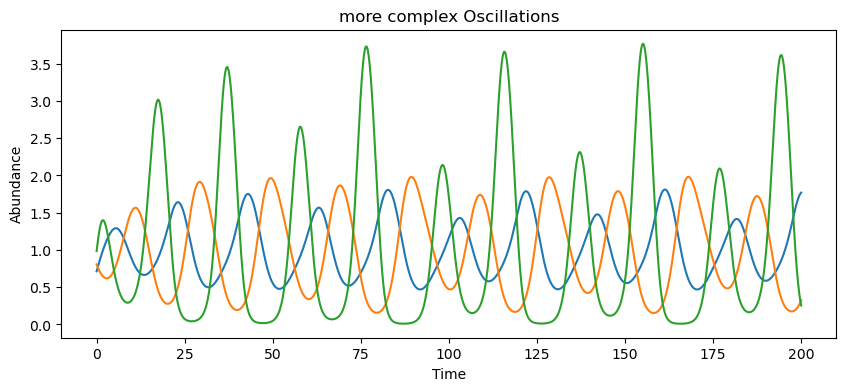

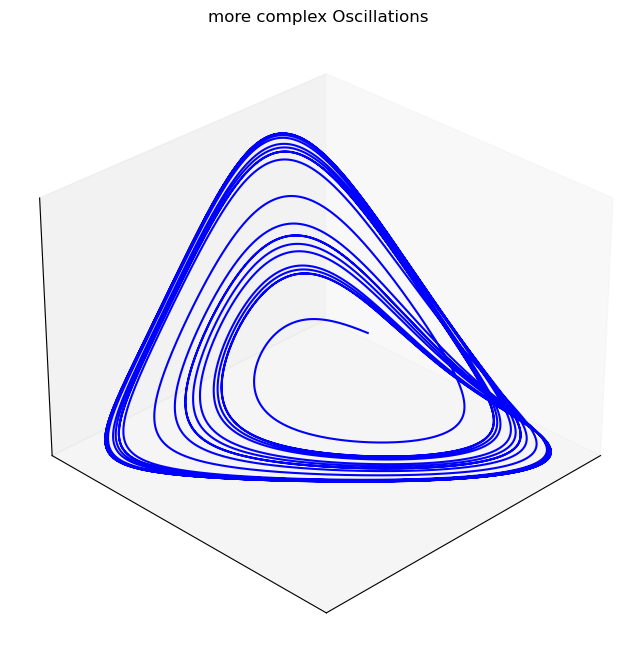

In [41]:
#even more bifurcations
alpha = 1.387
param = [[0.5,0.5,0.1], [-0.5,-0.1,0.1], [alpha, 0.1,0.1]]
lv = LotkaVolterraMulti(param, x)
lv.run(400.,0.01)
plot_3species(lv.time_hist[:20000], lv.abundance_hist[:20000], "more complex Oscillations")
plot_3species_phase(lv.time_hist, lv.abundance_hist, "more complex Oscillations")

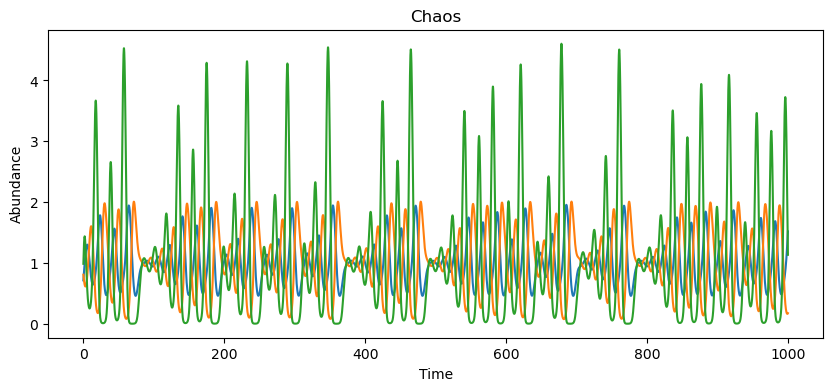

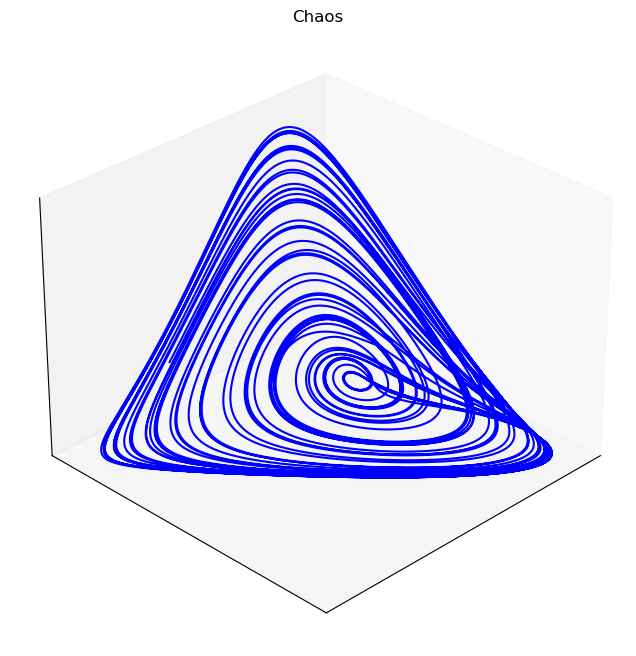

In [42]:
#chaos (run for a longer time
alpha = 1.5
param = [[0.5,0.5,0.1], [-0.5,-0.1,0.1], [alpha, 0.1,0.1]]
lv = LotkaVolterraMulti(param, x)
lv.run(1000.,0.01)
plot_3species(lv.time_hist, lv.abundance_hist, "Chaos")
plot_3species_phase(lv.time_hist, lv.abundance_hist, "Chaos")

In [51]:
#create two time series with slightly different initialization values
x = np.array([0.29721707, 0.50055865, 0.84398311])
alpha = 1.5
param = [[0.5,0.5,0.1], [-0.5,-0.1,0.1], [alpha, 0.1,0.1]]
lv = LotkaVolterraMulti(param, x)
lv.run(1000.,0.01)
one_time = lv.time_hist
one_abund = lv.abundance_hist
print("Initial values: ", x)
#create slightly different initial values
x2 = x.copy()
x2[0] += 0.0000001
lv = LotkaVolterraMulti(param, x2)
lv.run(1000.,0.01)
two_time = lv.time_hist
two_abund = lv.abundance_hist
print("the other initial values: ", x2)

Initial values:  [0.29721707 0.50055865 0.84398311]
the other initial values:  [0.29721717 0.50055865 0.84398311]


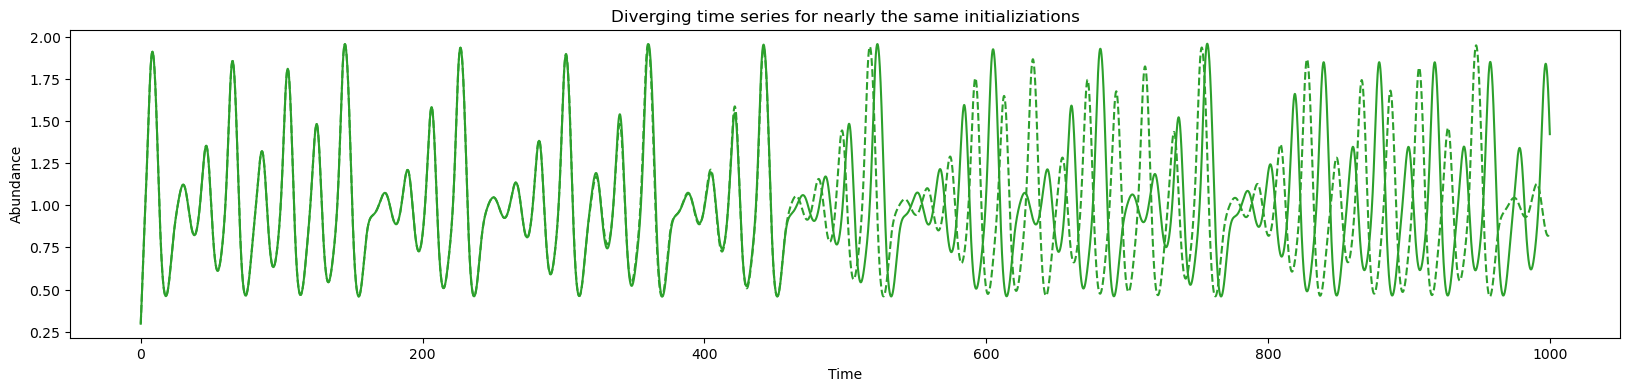

In [52]:
#plot the two time series of the first species
plt.figure(figsize = (20,4))
plt.plot(one_time, np.array(one_abund)[:,0], color = "#2ca02c")    
plt.plot(two_time, np.array(two_abund)[:,0], color = "#2ca02c", linestyle = "--")    
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title("Diverging time series for nearly the same initializiations")
plt.savefig("diverging.png")
plt.show()
    

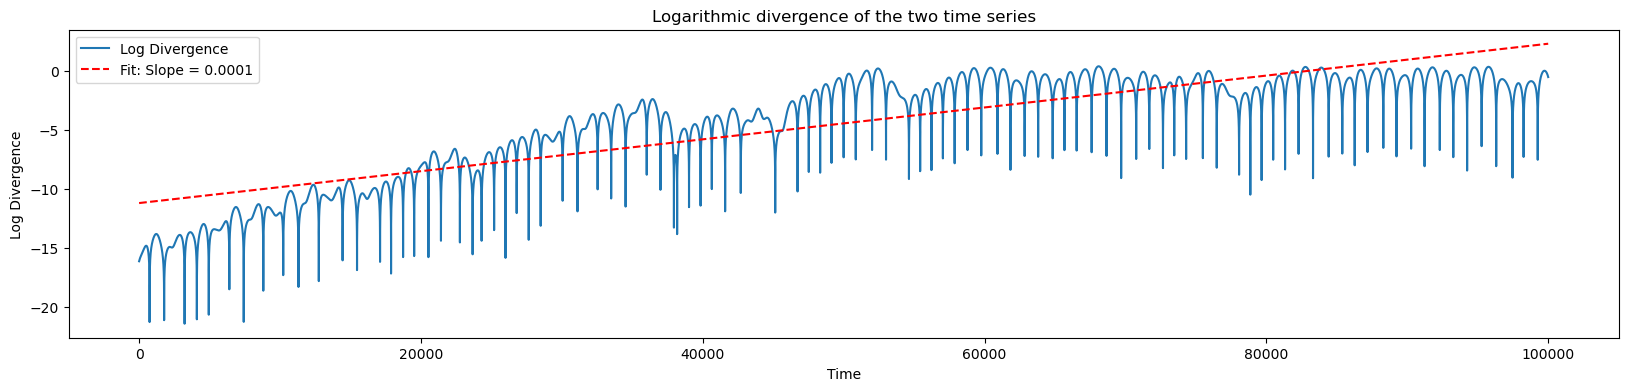

Largest Lyapunov Exponent = 0.0001


In [55]:
#prove exponential growing
distances = np.abs(np.array(one_abund)[:,0] - np.array(two_abund)[:,0]) #absolute distances
distances = distances[distances > 0] #no zero values (because log 0 is not defined
log_divergence = np.log(distances) #transform to logarithm (when the growing is exponential, the logarithms should be linear)
time = np.arange(len(log_divergence))
slope, intercept, _, _, _ = linregress(time, log_divergence) #find the line
#plot
plt.figure(figsize=(20,4))
plt.plot(time, log_divergence, label='Log Divergence')
plt.plot(time, slope*time + intercept, 'r--', label=f'Fit: Slope = {slope:.4f}')
plt.xlabel('Time')
plt.ylabel('Log Divergence')
plt.title('Logarithmic divergence of the two time series')
plt.legend()
plt.savefig("lyapunov.png")
plt.show()

# 6. Largest Lyapunov Exponent
print(f"Largest Lyapunov Exponent = {slope:.4f}")
